<a href="https://colab.research.google.com/github/data602sps/datasetspractice/blob/main/07_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 7**

# **Weeks 8 & 9 - Pandas**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 

* You must use Pandas as the **primary tool** to process your data.

* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  
 * https://www.youtube.com/watch?v=inN8seMm7UI (Getting started with Colab).

* Your data should need some "work", or be considered "dirty".  You must show your skills in data cleaning/wrangling.

### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

The data set, [NFL 2019 Regular Season Games](https://github.com/ryurko/nflscrapR-data/blob/master/games_data/regular_season/reg_games_2019.csv), used for this analysis and exploration is NFL play by play data that was collected by researchers from Carnegie Mellon that wanted to make this information publicly available for modeling purposes. At the time the NFL was the only professional sports league in the US that did not provide this level of detail for researchers. Therefore, they built an R package that scraped the information managed by the league and have also posted the raw data in GitHub. The reason I chose this data set was that it came up in research on Kaggle with a lot of missing values that would be good practice for data wrangling and cleaning in Python.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



In [1]:
### Loading & Previewing the Data
import pandas as pd
import re
df = pd.read_csv('https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/play_by_play_data/regular_season/reg_pbp_2019.csv')
df.head()

/Users/JoshForster/anaconda3/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (167,168,169,170,175,176,179,180,183,184,189,190,191,192,195,196,204,205,206,219,220,221,222,223,224,227,228,232,233,234,239,241,242) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,35,2019090500,CHI,GB,GB,away,CHI,CHI,35.0,2019-09-05,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,50,2019090500,CHI,GB,GB,away,CHI,GB,75.0,2019-09-05,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,71,2019090500,CHI,GB,GB,away,CHI,GB,75.0,2019-09-05,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,95,2019090500,CHI,GB,GB,away,CHI,GB,75.0,2019-09-05,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,125,2019090500,CHI,GB,GB,away,CHI,GB,85.0,2019-09-05,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [2]:
### Columns: Reviewing the full column name list for future subsetting
print(f'Number of columns: {len(list(df.columns))}')
list(df.columns)

Number of columns: 256


['play_id',
 'game_id',
 'home_team',
 'away_team',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'posteam_score_post',
 'defteam_score_post',
 'score_differential_post',
 'no_sc

# Commentary
There are a lot of fields available within this data set and given the column width 
it would be best to probably pare it down to a more manageable subset to review

In [3]:
df.describe()

,play_id,game_id,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,...,lateral_sack_player_name,fumble_recovery_1_yards,fumble_recovery_2_yards,return_yards,penalty_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
count,45546.000000,4.554600e+04,43870.000000,45529.000000,45529.00000,45529.000000,45546.000000,45546.000000,45546.000000,45546.000000,...,0.0,587.000000,8.000000,45546.000000,3447.000000,45546.000000,43906.000000,43906.000000,43906.0,43906.0
mean,2178.986475,2.019107e+09,48.913130,406.587472,799.98289,1699.053812,0.022966,11.830589,0.073332,2.568041,...,NaN,2.925043,1.625000,0.722983,8.496954,0.009156,0.000137,0.000046,0.0,0.0
std,1260.885371,1.147626e+04,24.464682,280.707121,557.01324,1050.053783,0.149796,6.832129,0.260684,1.119961,...,NaN,10.360787,4.206712,4.426087,5.246720,0.095247,0.011689,0.006749,0.0,0.0
min,35.000000,2.019090e+09,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,...,NaN,-11.000000,0.000000,-14.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1092.000000,2.019100e+09,31.000000,140.000000,269.00000,791.000000,0.000000,6.000000,0.000000,2.000000,...,NaN,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,2161.000000,2.019110e+09,50.000000,386.000000,785.00000,1800.000000,0.000000,12.000000,0.000000,3.000000,...,NaN,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,3236.000000,2.019120e+09,70.000000,651.000000,1279.00000,2576.000000,0.000000,17.000000,0.000000,4.000000,...,NaN,0.000000,0.250000,0.000000,10.000000,0.000000,0.000000,0.000000,0.0,0.0
max,5921.000000,2.019123e+09,99.000000,900.000000,1800.00000,3600.000000,1.000000,33.000000,1.000000,5.000000,...,NaN,100.000000,12.000000,104.000000,53.000000,1.000000,1.000000,1.000000,0.0,0.0


# Observations from above
There are a lot of numeric variables many of which appear to only have zeros and ones which may mean 
one hot encoding. Although when thinking about how the data is structured, it makes sense that one play will likely have zero or null values for many the tracked attributes.

In [5]:
df.isnull().sum()

play_id                              0
game_id                              0
home_team                            0
away_team                            0
posteam                           1696
posteam_type                      1640
defteam                           1640
side_of_field                       88
yardline_100                      1676
game_date                            0
quarter_seconds_remaining           17
half_seconds_remaining              17
game_seconds_remaining              17
game_half                            0
quarter_end                          0
drive                                0
sp                                   0
qtr                                  0
down                              7315
goal_to_go                        1620
time                                17
yrdln                               88
ydstogo                              0
ydsnet                               0
desc                                 0
play_type                

In [6]:
df.dtypes

play_id                            int64
game_id                            int64
home_team                         object
away_team                         object
posteam                           object
posteam_type                      object
defteam                           object
side_of_field                     object
yardline_100                     float64
game_date                         object
quarter_seconds_remaining        float64
half_seconds_remaining           float64
game_seconds_remaining           float64
game_half                         object
quarter_end                        int64
drive                              int64
sp                                 int64
qtr                                int64
down                             float64
goal_to_go                       float64
time                              object
yrdln                             object
ydstogo                            int64
ydsnet                             int64
desc            

Most of the fields are numeric and appear to be null for this data set.

# Data Wrangling
Create a subset of your original data and perform the following.  

1. Modify multiple column names.

2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.

3. Fix missing and invalid values in data.

4. Create new columns based on existing columns or calculations.

5. Drop column(s) from your dataset.

6. Drop a row(s) from your dataset.

7. Sort your data based on multiple variables. 

8. Filter your data based on some condition. 

9. Convert all the string values to upper or lower cases in one column.

10. Check whether numeric values are present in a given column of your dataframe.

11. Group your dataset by one column, and get the mean, min, and max values by group. 
  * Groupby()
  * agg() or .apply()

12. Group your dataset by two columns and then sort the aggregated results within the groups. 

**You are free (and should) to add on to these questions.  Please clearly indicate in your assignment your answers to these questions.**

# Subset Data Set
There were so many columns that it made sense to focus on one particular group within this data set although I can't believe how many stats are tracked for a given play. I chose to look through the fumble data for the year of play calls so see if anything interesting appears

In [18]:
selected_cols = [c for c in df.columns if re.search('play_id|game_id|home_team|away_team|^down$|qtr|game_date|fumble.+',c)]
subset = df.loc[:,selected_cols]
subset.shape

(45546, 31)

# Review summary statistics and data types

In [19]:
subset.describe()

,play_id,game_id,qtr,down,fumble_forced,fumble_not_forced,fumble_out_of_bounds,fumble_lost,fumble_recovery_1_yards,fumble_recovery_2_yards
count,45546.000000,4.554600e+04,45546.000000,38231.000000,43906.000000,43906.000000,43906.000000,43906.000000,587.000000,8.000000
mean,2178.986475,2.019107e+09,2.568041,1.986320,0.010090,0.004601,0.001184,0.006833,2.925043,1.625000
std,1260.885371,1.147626e+04,1.119961,1.000547,0.099941,0.067673,0.034394,0.082379,10.360787,4.206712
min,35.000000,2.019090e+09,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-11.000000,0.000000
25%,1092.000000,2.019100e+09,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2161.000000,2.019110e+09,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3236.000000,2.019120e+09,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
max,5921.000000,2.019123e+09,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,100.000000,12.000000


In [20]:
#review data types
subset.dtypes

play_id                                 int64
game_id                                 int64
home_team                              object
away_team                              object
game_date                              object
qtr                                     int64
down                                  float64
fumble_forced                         float64
fumble_not_forced                     float64
fumble_out_of_bounds                  float64
fumble_lost                           float64
forced_fumble_player_1_team            object
forced_fumble_player_1_player_id       object
forced_fumble_player_1_player_name     object
forced_fumble_player_2_team            object
forced_fumble_player_2_player_id       object
forced_fumble_player_2_player_name     object
fumbled_1_team                         object
fumbled_1_player_id                    object
fumbled_1_player_name                  object
fumbled_2_player_id                    object
fumbled_2_player_name             

In [36]:
# playerid looks to be a string value as compared to game/play id
subset['fumble_recovery_1_player_id'].head(25)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14    00-0033293
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
Name: fumble_recovery_1_player_id, dtype: object

In [30]:
#converting date value to be able to use date properties
subset['game_date_value'] = subset['game_date'].astype('datetime64')
subset['game_date_value'].head()

In [37]:
# reviewing mix of forced vs not forced fumbles. Can they both be true?
subset.groupby(['fumble_forced','fumble_not_forced']).count()

play_id  game_id  home_team  away_team  \
fumble_forced fumble_not_forced                                           
0.0           0.0                  43267    43267      43267      43267   
              1.0                    196      196        196        196   
1.0           0.0                    437      437        437        437   
              1.0                      6        6          6          6   

                                 game_date    qtr   down  \
fumble_forced fumble_not_forced                            
0.0           0.0                    43267  43267  37541   
              1.0                      196    196    194   
1.0           0.0                      437    437    420   
              1.0                        6      6      6   

                                 fumble_out_of_bounds  fumble_lost  \
fumble_forced fumble_not_forced                                      
0.0           0.0                               43267        43267   
              1.0                                 196          196   
1.0           0.0                                 437          437   
              1.0                                   6            6   

                                 forced_fumble_player_1_team       ...         \
fumble_forced fumble_not_forced                                    ...          
0.0           0.0                                          0       ...          
              1.0                                          0       ...          
1.0           0.0                                        437       ...          
              1.0                                          6       ...          

                                 fumbled_2_team  fumble_recovery_1_team  \
fumble_forced fumble_not_forced                                           
0.0           0.0                             0                       0   
              1.0                             1                     182   
1.0           0.0                             1                     399   
              1.0                             4                       6   

                                 fumble_recovery_1_yards  \
fumble_forced fumble_not_forced                            
0.0           0.0                                      0   
              1.0                                    182   
1.0           0.0                                    399   
              1.0                                      6   

                                 fumble_recovery_1_player_id  \
fumble_forced fumble_not_forced                                
0.0           0.0                                          0   
              1.0                                        182   
1.0           0.0                                        399   
              1.0                                          6   

                                 fumble_recovery_1_player_name  \
fumble_forced fumble_not_forced                                  
0.0           0.0                                            0   
              1.0                                          182   
1.0           0.0                                          399   
              1.0                                            6   

                                 fumble_recovery_2_team  \
fumble_forced fumble_not_forced                           
0.0           0.0                                     0   
              1.0                                     1   
1.0           0.0                                     1   
              1.0                                     6   

                                 fumble_recovery_2_yards  \
fumble_forced fumble_not_forced                            
0.0           0.0                                      0   
              1.0                                      1   
1.0           0.0                                      1   
              1.0                                      6   

   

In [52]:
#display all columns for review
pd.set_option('display.max_columns', None)
both_fumble = (subset['fumble_forced']==1)&(subset['fumble_not_forced']==1)
subset2 = subset[~both_fumble]
#how can a fumble be forced and not forced at the same time and given this illogical scenario I will filter these rows out

In [53]:
#reviewing null values in remaining columns
subset2.isnull().sum()

play_id                                   0
game_id                                   0
home_team                                 0
away_team                                 0
game_date                                 0
qtr                                       0
down                                   7315
fumble_forced                          1640
fumble_not_forced                      1640
fumble_out_of_bounds                   1640
fumble_lost                            1640
forced_fumble_player_1_team           45103
forced_fumble_player_1_player_id      45103
forced_fumble_player_1_player_name    45103
forced_fumble_player_2_team           45539
forced_fumble_player_2_player_id      45539
forced_fumble_player_2_player_name    45539
fumbled_1_team                        44907
fumbled_1_player_id                   44907
fumbled_1_player_name                 44907
fumbled_2_player_id                   45538
fumbled_2_player_name                 45538
fumbled_2_team                  

In [70]:
# replace null value with none for string field
subset2['forced_fumble_player_1_team'].fillna('None',inplace=True)
subset2['forced_fumble_player_1_team'].isnull().sum()
subset2.groupby('forced_fumble_player_1_team')['game_date'].count()
#verify the filled na values worked as expected

forced_fumble_player_1_team
ARI        19
ATL        17
BAL        13
BUF        15
CAR         8
CHI        12
CIN         9
CLE        12
DAL        14
DEN         9
DET        16
GB         11
HOU        14
IND        14
JAX        13
KC         13
LA         15
LAC         6
MIA         8
MIN        19
NE         15
NO         11
NYG         9
NYJ        10
None    45103
OAK         9
PHI        14
PIT        22
SEA        20
SF         22
TB         21
TEN        11
WAS        16
Name: game_date, dtype: int64

In [58]:
#not clear why a play would not have a down associated with it and therefore excluding since it wouldn't be relevant
subset_downs = subset2[pd.notna(subset2['down'])]
subset_downs.sort_values(['home','away','game_date','game_id'],ascending=[True,True,True,True])

In [60]:
#renaming a few columns based on my preferences and providing alternative cases for fields
subset_renamed = subset_downs.rename(columns={'qtr':'quarter','home_team':'home','away_team':'away','game_date':'game_date_str','game_date_value':'game_date'})
subset_renamed['home_lower'] = subset_renamed['home'].apply(lambda x: x.lower())
subset_renamed['away_lower'] = subset_renamed['away'].apply(lambda x: x.lower())

In [63]:
# counting the number of playerids that only have numbers
subset_renamed['forced_fumble_player_1_player_id'].str.isnumeric().count()

420

Percentage of Fumbles for Home Team based on [Stack Overflow link](https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby)

In [78]:
subset_renamed['team_fumbled'] = subset_renamed.apply(lambda x: 'home' if x['fumbled_1_team']==x['home'] else 'away',axis=1)
subset_renamed['home_fumble_percentage'] = 100 * subset_renamed['fumble_forced'] / subset_renamed.groupby('team_fumbled')['fumble_forced'].transform('sum')

In [79]:
subset_renamed.groupby('team_fumbled')['home_fumble_percentage'].describe()

,count,mean,std,min,25%,50%,75%,max
team_fumbled,,,,,,,,
away,37841.0,0.002643,0.035291,0.0,0.0,0.000000,0.000000,0.473934
home,314.0,0.318471,0.226092,0.0,0.0,0.478469,0.478469,0.478469


In [82]:
subset_renamed.groupby('forced_fumble_player_1_team')['fumble_forced'].count().sort_values(ascending=False)
#grouping by the teams with the most forced fumbles during the 2019 season

forced_fumble_player_1_team
None    37735
SF         22
TB         21
ARI        19
SEA        19
PIT        19
MIN        18
BUF        15
DET        15
WAS        15
LA         15
DAL        14
NE         14
PHI        14
IND        14
HOU        14
ATL        13
BAL        13
JAX        13
CHI        12
KC         12
CLE        12
GB         11
NO         11
TEN        10
CIN         9
NYJ         9
NYG         9
DEN         8
OAK         8
CAR         8
MIA         8
LAC         6
Name: fumble_forced, dtype: int64

In [84]:
subset_renamed.groupby('fumbled_1_team')['fumble_forced'].count().sort_values(ascending=False)

fumbled_1_team
PHI    29
NYG    29
MIN    27
PIT    26
SEA    25
MIA    25
CIN    24
CAR    24
BUF    23
TB     22
LAC    21
ATL    21
TEN    21
HOU    20
WAS    20
DEN    20
OAK    20
JAX    19
NYJ    19
SF     18
BAL    18
LA     17
KC     16
IND    16
DAL    15
GB     15
CLE    14
DET    12
CHI    10
NE     10
NO      9
ARI     9
Name: fumble_forced, dtype: int64

In [93]:
fumbles_only = subset_renamed[(subset_renamed['fumble_forced']==1)|(subset_renamed['fumble_not_forced']==1)]
fumbles_by_game = fumbles_only.groupby(['home','away','game_id'])['fumble_forced'].count().sort_values(ascending=[False])
#fumbles_only.columns

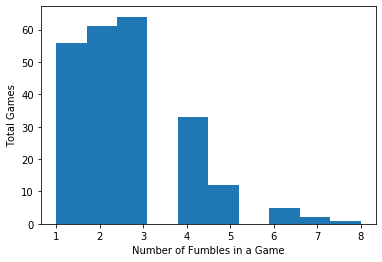

In [96]:
import matplotlib.pyplot as plt

plt.hist(fumbles_by_game)
plt.xlabel('Number of Fumbles in a Game')
plt.ylabel('Total Games')
plt.show() 

For games with fumbles there is a fairly right skewed distribution in 2019 and it makes sense that most games with fumbles are lower values, but for those games with 4 or more fumbles was the weather a factor in increasing the total number. 

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  What would you explore further with more time?

Teams in general appear to fumble the ball more often on the road compared to at home. There are a number of reasons why this might be the case, but one possible hypothesis could be around players' confidence and the intimidation factor of the home crowd. Incorporating fan attendence would also be an interesting measure to try to capture a relevant statistic that might best measure their presence and perhaps there is a decibal level for the amount of sound they generate? The fumbles subset of data is also a good starting point to understand how turnovers impact defensive ratings and game scores overall. Is there a strong correlation between those teams that fumble or not and win loss record or even attendence. These are some of the initial questions I would look to further explore if given more time to review the data.